# Putting it all together


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "../data/raw"


In [2]:
HO = pd.read_csv(
    os.path.join(DATA_PATH, "ho.csv"), parse_dates=["Date"], index_col=["Date"]
)
NG = pd.read_csv(
    os.path.join(DATA_PATH, "ng.csv"), parse_dates=["Date"], index_col=["Date"]
)


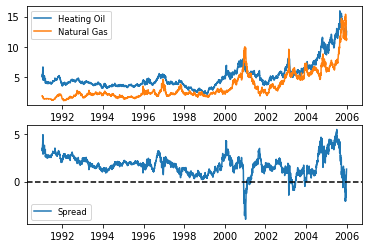

In [3]:
# Plot the prices separately
plt.subplot(2, 1, 1)
plt.plot(7.25 * HO, label="Heating Oil")
plt.plot(NG, label="Natural Gas")
plt.legend(loc="best", fontsize="small")

# Plot the spread
plt.subplot(2, 1, 2)
plt.plot(7.25 * HO - NG, label="Spread")
plt.legend(loc="best", fontsize="small")
plt.axhline(y=0, linestyle="--", color="k")
plt.show()


In [4]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO["Close"])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG["Close"])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller((7.25 * HO - NG)["Close"])
print("The p-value for the ADF test on the spread is ", result_spread[1])


The p-value for the ADF test on HO is  0.9567108785017873
The p-value for the ADF test on NG is  0.9008747444676731
The p-value for the ADF test on the spread is  7.019439302142338e-05


In [5]:
BTC = pd.read_csv(
    os.path.join(DATA_PATH, "btc.csv"), parse_dates=["Date"], index_col=["Date"]
)
ETH = pd.read_csv(
    os.path.join(DATA_PATH, "eth.csv"), parse_dates=["Date"], index_col=["Date"]
)


In [6]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC, ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC["Price"] - b * ETH["Price"])
print("The p-value for the ADF test is ", adf_stats[1])


/usr/lib/python3/dist-packages/cvxopt/__init__.py:136: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if val is 0: val = None


The p-value for the ADF test is  0.023369002323472707


## Case study: climate change


In [7]:
temp_NY = pd.read_csv(
    os.path.join(DATA_PATH, "temp_ny.csv"), parse_dates=["DATE"], index_col=["DATE"]
)


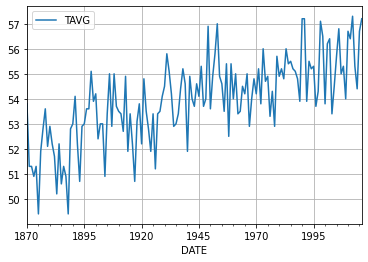

The p-value for the ADF test is  0.5832938987871152


In [8]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format="%Y")

# Plot average temperatures
temp_NY.plot(grid=True)
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY["TAVG"])
print("The p-value for the ADF test is ", result[1])


/home/prime/.local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


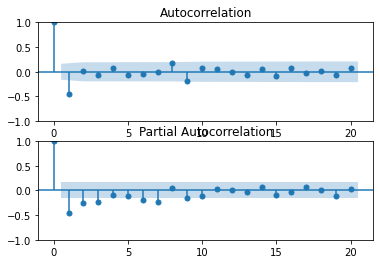

In [9]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2, 1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()


In [11]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(chg_temp, order=(1, 0, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(chg_temp, order=(2, 0, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(chg_temp, order=(1, 0, 1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)


/home/prime/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/home/prime/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/home/prime/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/home/prime/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/home/prime/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536

The AIC for an AR(1) is:  510.53468987331087
The AIC for an AR(2) is:  501.9274123409139
The AIC for an ARMA(1,1) is:  469.07291979089666


In [12]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, order=(1, 1, 1))
res = mod.fit()

# Plot the original series and the forecasted series
# res.plot_predict(start="1872-01-01", end="2046-01-01")
plt.show()


/home/prime/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/home/prime/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/home/prime/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
